In [38]:
from PIL import Image
import os
import torchvision.transforms.v2 as transforms
from torchvision import tv_tensors
import random
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
from matplotlib import pyplot as plt

class MuraDS(Dataset):
    def __init__(self, mura_path):
        image_paths = pd.read_csv(os.path.join(mura_path, "MURA-v1.1/train_image_paths.csv"))
        self.transforms = [transforms.RandomAffine(degrees=30), transforms.RandomAffine(0, translate=(0.2, 0.2))]
        self.data = []
        self.labels = []
        self.mura_path = mura_path
        self.t1 = transforms.PILToTensor()
        for _, row in image_paths.iterrows():
            self.data.append(row.iloc[0])
            self.labels.append(1 if "positive" in row.iloc[0] else 0)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        transform = transforms.Compose([random.choice(self.transforms), transforms.Grayscale(), transforms.Resize((128, 128))])
        if isinstance(idx, list):
            imgs = []
            labels = []
            for i in idx:
                img = self.t1(Image.open(os.path.join(self.mura_path, self.data[i])))
                label = self.labels[i]
                # transform
                imgs.append(img)
                labels.append(label)
            return transform(imgs), labels
        img = self.t1(Image.open(os.path.join(self.mura_path, self.data[idx])))
        return torch.squeeze(transform(img)), self.labels[idx]

In [39]:
ds = MuraDS("./data/mura")
dataloader = DataLoader(ds, batch_size=4, shuffle=True)
batch_1, labels_1 = next(iter(dataloader))

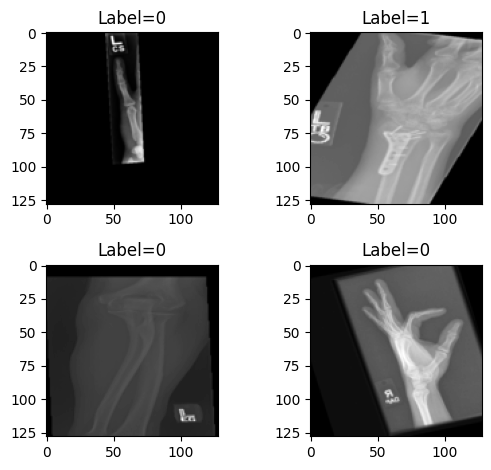

In [40]:
def show_batch(batch, labels):
    f, subs = plt.subplots(2,2)
    f.set_tight_layout(True)
    for i in range(2):
        for j in range(2):
            curr = subs[i][j]
            idx = (2*i)+j
            curr.imshow(torch.squeeze(batch[idx]), cmap='gray')
            curr.set_title(f"Label={labels[idx]}")

show_batch(batch_1, labels_1)

In [42]:
model = torch.hub.load('ultralytics/yolov8', 'yolov8s.pt', pretrained=True)

/home/sinha/.local/lib/python3.10/site-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


HTTPError: HTTP Error 404: Not Found